# 1. What is the average salary (yearly) for Data Analyst jobs across different cities or states in the U.S.?

In [1]:
# Importing the needed libraries

import pandas as pd
import plotly.express as px
from IPython.display import Image

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Loading And Cleaning the datta

In [2]:
# Load the data
data_loaded = pd.read_csv(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Data\data_jobs.csv')

# Filter Data for Data Analyst Jobs listed in the United States
df_USA = data_loaded[(data_loaded['job_country'] == 'United States') &
                     (data_loaded['job_title_short'] == 'Data Analyst')].copy()

# From the info viewed, the job_posted_date column is showed as an object(str)
# We will transform the date column to have datetime as a data type

df_USA['job_posted_date'] = pd.to_datetime(df_USA['job_posted_date'])

# Adding a month column to the data
df_USA['job_posted_month'] = df_USA['job_posted_date'].dt.month_name()
df_USA['job_posted_day'] = df_USA['job_posted_date'].dt.day_name()

df_USA_cleaned = df_USA.dropna(subset=['salary_year_avg']).reset_index().drop('index', axis =1)

# View the head of the data
print('Shape of the data:',(df_USA_cleaned.shape))
df_USA_cleaned.head()

Shape of the data: (4350, 19)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day
0,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",October,Thursday
1,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"['excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint']}",February,Monday
2,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"['sql', 'word', 'excel', 'visio', 'powerpoint'...","{'analyst_tools': ['word', 'excel', 'visio', '...",January,Tuesday
3,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"['sql', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr...",November,Tuesday
4,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"['sql', 'excel', 'power bi']","{'analyst_tools': ['excel', 'power bi'], 'prog...",October,Tuesday


In [3]:
# Filtering out the columns needed for the question
df_jobloc_salary = df_USA_cleaned[['job_location','salary_year_avg']].sort_values(by = 'salary_year_avg', 
                                                                                  ascending=False)
# Show the Top 10 info
df_jobloc_salary.head(10)

,job_location,salary_year_avg
2568,"Jacksonville, FL",375000.0
1281,"Bethesda, MD",375000.0
3457,"Bethesda, MD",375000.0
654,"Austin, TX",375000.0
4340,"Austin, TX",350000.0
1164,"San Francisco, CA",350000.0
3334,Anywhere,336500.0
1913,"San Francisco, CA",285000.0
2173,Anywhere,255829.5
70,"Austin, TX",254000.0


In [4]:
# Add the count column and plot to see how many job postings are there and the salary they pay
df_jobloc_size = df_jobloc_salary.groupby('job_location').agg(
        count = ('job_location', 'size'),
        Salary_Avg = ('salary_year_avg', 'median')
        ).sort_values(by = 'count', ascending=False).head(20)

# Print the dataframe6
df_jobloc_size

,count,Salary_Avg
job_location,,
Anywhere,568,87500.0
"New York, NY",327,94068.5
"Chicago, IL",130,91250.0
"Atlanta, GA",117,90000.0
"Washington, DC",107,95000.0
"Tampa, FL",97,98900.0
"Los Angeles, CA",97,96500.0
"Dallas, TX",82,90000.0
"San Francisco, CA",75,115000.0


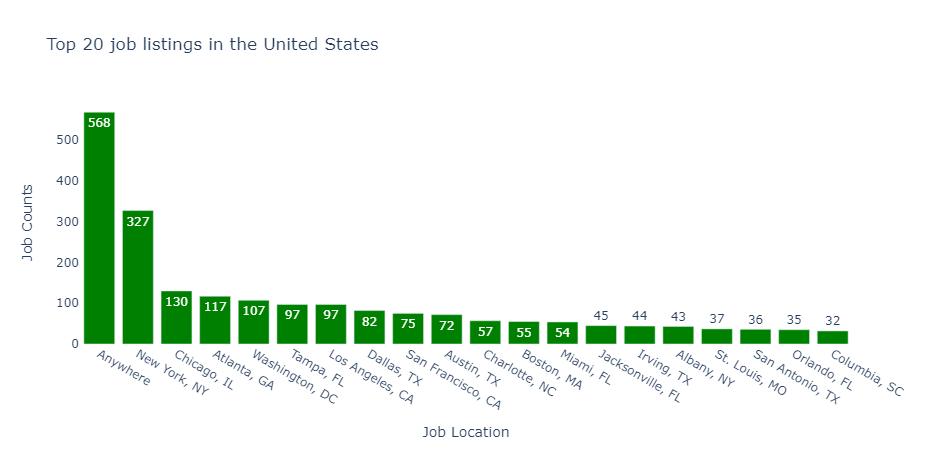

In [16]:
# Plot a bar chart showing the job count (job postings) in the United States
fig = px.bar(data_frame = df_jobloc_size, x = df_jobloc_size.index, y = 'count' ,
              title='Top 20 job listings in the United States',color_discrete_sequence=['green'],
              labels={'job_location':'Job Location','count':'Job Counts'},
              text_auto= True)

fig.update_layout(plot_bgcolor = '#ffffff', paper_bgcolor = '#ffffff')
# fig.show()

Image(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Images\Top_20_job_postings.png')


In [6]:
# Sort the data frame by the salary_year_avg to be ploted

df_jobloc_size_salary = df_jobloc_size.sort_values(by = 'Salary_Avg', ascending=False)
df_jobloc_size_salary

,count,Salary_Avg
job_location,,
"San Francisco, CA",75,115000.0
"Tampa, FL",97,98900.0
"Los Angeles, CA",97,96500.0
"Washington, DC",107,95000.0
"Jacksonville, FL",45,95000.0
"New York, NY",327,94068.5
"Irving, TX",44,94035.0
"Austin, TX",72,94000.0
"Chicago, IL",130,91250.0


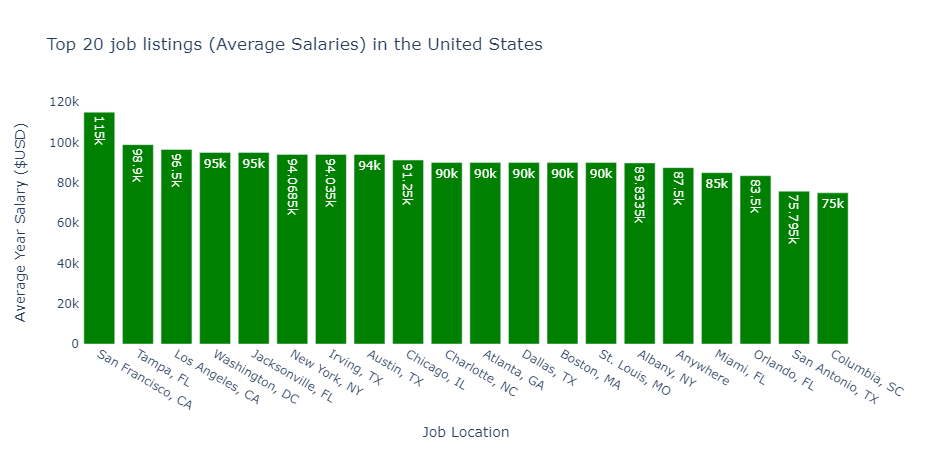

In [11]:
# Plot a bar chart showing the Average Salaries in the United States
fig = px.bar(data_frame = df_jobloc_size_salary, x = df_jobloc_size_salary.index, y = 'Salary_Avg',
              title='Top 20 job listings (Average Salaries) in the United States',color_discrete_sequence=['green'],
              labels={'job_location':'Job Location','Salary_Avg':'Average Year Salary ($USD)'},
              text_auto=True)
       
fig.update_layout(plot_bgcolor = '#ffffff', paper_bgcolor = '#ffffff')
# fig.show()

Image(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Images\Top_20_job_average_salaries.png')
